In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [3]:
df = pd.read_csv("timein.csv")
df.head()

,Date,Day of Week,Time,Temp (F)
0,1/09/2018,Tuesday,9:07,23.0
1,1/10/2018,Wednesday,8:58,21.0
2,1/11/2018,Thursday,9:00,39.0
3,1/12/2018,Friday,9:18,62.0
4,1/15/2018,Monday,8:09,22.0


In [4]:
sec = 0
totsec = 0
eachday = {}
daydiff = {}
weekdiff = {}
upavg = 0
eachday["Monday"],eachday["Tuesday"],eachday["Wednesday"],eachday["Thursday"],eachday["Friday"]= 0,0,0,0,0
for day in eachday:
    tt = df.loc[df["Day of Week"] == day]
    count = 0
    upavg = 0
    totsec2 = 0
    for index, row in tt.iterrows():
        count += 1
        date = row["Date"]
        time = row["Time"]
        sec = int(time[0])*3600+int(time[2:])*60
        totsec2 += sec
        upavg = totsec2/count
        weekdiff[date] = (sec - upavg)/60
        eachday[day] += sec
    eachday[day] = eachday[day]/len(tt)

In [5]:
dts = {}
for index, row in df.iterrows():
    date = row["Date"]
    time = row["Time"]
    sec = int(time[0])*3600+int(time[2:])*60
    totsec += sec
    daydiff[date] = 0
    upavg = totsec/len(daydiff)
    daydiff[date] = (sec - upavg)/60
    dts[date] = sec

NameError: name 'ntimes2' is not defined

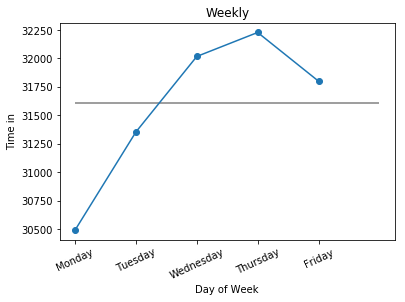

In [6]:
plt.clf()
new = totsec/(len(df))
week = np.arange(5)
plt.plot(week, [e for e in eachday.values()], '-o')
plt.title("Weekly")
plt.ylabel("Time in")
plt.xlabel("Day of Week")
plt.xticks(week, [e for e in eachday.keys()], rotation = 25)

plt.hlines(y=new, xmin=0, xmax=5, color="grey")
plt.yticks(ntimes2, rtimes2)
plt.tight_layout()

plt.show()

In [ ]:
plt.clf()
dates = [e for e in dts.keys()]
len_dates = len(dates)
newmarks = []
ndates = []
k = 0
interv = len(dates)/5-.1
while k < len_dates:
    newmarks.append(int(k))
    ndates.append(dates[int(k)])
    k+=interv
xs = np.arange(len(dts))
plt.plot(xs, [e for e in dts.values()], '-o')
plt.title("Overall")
plt.ylabel("Time in")
plt.xlabel("Date")
plt.xticks(newmarks, ndates, rotation = 25)
plt.yticks(ntimes, rtimes)
plt.hlines(y=new, xmin=0, xmax=len(df), color="grey")
plt.tight_layout()
# plt.show()
plt.savefig("overall.png")


In [7]:
rtimes = ["8:00", "8:20", "8:40", "9:00", "9:20"]
ntimes = [int(e[0])*3600+int(e[2:])*60 for e in rtimes]
rtimes2 = ["8:00", "8:15", "8:30", "8:45", "9:00"]
ntimes2 = [int(e[0])*3600+int(e[2:])*60 for e in rtimes]

In [8]:
render_days = {}
for e in eachday:
    day = eachday[e]
    hr = str(day/3600)[0]
    minu = str((day-int(hr)*3600)/60)
    minu = minu[:minu.find(".")]
    avg = hr+":"+minu
    render_days[e] = avg
render_days

{'Friday': '8:50',
 'Monday': '8:28',
 'Thursday': '8:57',
 'Tuesday': '8:42',
 'Wednesday': '8:53'}